In [2]:
import pandas as pd
from unidecode import unidecode
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


In [3]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

# Mostrar algunas filas para verificar
print(data[['keyword', 'location', 'text']].head())

# Verificar valores únicos en 'keyword' y 'location' después de la limpieza
print("\nValores únicos en 'keyword':", data['keyword'].nunique())
print("Valores únicos en 'location':", data['location'].nunique())

# Mostrar algunas estadísticas sobre la longitud del texto después de la limpieza
data['text_length'] = data['text'].str.len()
print("\nEstadísticas de longitud del texto:")
print(data['text_length'].describe())


  keyword location                                               text
0     NaN      NaN  Our Deeds are the Reason of this #earthquake M...
1     NaN      NaN             Forest fire near La Ronge Sask. Canada
2     NaN      NaN  All residents asked to 'shelter in place' are ...
3     NaN      NaN  13,000 people receive #wildfires evacuation or...
4     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...

Valores únicos en 'keyword': 221
Valores únicos en 'location': 3341

Estadísticas de longitud del texto:
count    7613.000000
mean      101.037042
std        33.780900
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rentt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
train = data.copy()

# Convertir el texto a mayúsculas o a minúsculas
train['keyword'] = train['keyword'].str.lower()
train['location'] = train['location'].str.lower()
train['text'] = train['text'].str.lower()

# Quitar los caracteres especiales que aparecen como "#","@" o los apóstrofes.
train['keyword'] = train['keyword'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
train['location'] = train['location'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
train['text'] = train['text'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

# Quitar las url
train['text'] = train['text'].str.replace(r'http\S+|www.\S+', '', regex=True)

# Revisar si hay emoticones y quitarlos
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

train['text'] = train['text'].apply(remove_emojis)

# Quitar los signos de puntuación
train['text'] = train['text'].str.replace(r'[^\w\s]', '', regex=True)

# Quitar los artículos, preposiciones y conjunciones (stopwords)
stop_words = set(stopwords.words('english'))
train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Quitar números si considera que interferirán en la clasificación
train['text'] = train['text'].str.replace(r'\b(?!911\b)\d+\b', '', regex=True)

# Mostrar algunas filas para verificar
print(train[['keyword', 'location', 'text']].head())

# Verificar valores únicos en 'keyword' y 'location' después de la limpieza
print("\nValores únicos en 'keyword':", train['keyword'].nunique())
print("Valores únicos en 'location':", train['location'].nunique())

#train = pd.read_csv('train_cleaned.csv')

#Mostrar algunas estadísticas sobre la longitud del texto después de la limpieza
train['text_length'] = train['text'].str.len()
print("\nEstadísticas de longitud del texto:")
print(train['text_length'].describe())

  keyword location                                               text
0     NaN      NaN       deeds reason earthquake may allah forgive us
1     NaN      NaN              forest fire near la ronge sask canada
2     NaN      NaN  residents asked shelter place notified officer...
3     NaN      NaN   people receive wildfires evacuation orders ca...
4     NaN      NaN  got sent photo ruby alaska smoke wildfires pou...

Valores únicos en 'keyword': 221
Valores únicos en 'location': 3233

Estadísticas de longitud del texto:
count    7613.000000
mean       64.894654
std        24.868745
min         3.000000
25%        46.000000
50%        66.000000
75%        84.000000
max       138.000000
Name: text_length, dtype: float64


In [6]:
test = data_test.copy()

# Convertir el texto a mayúsculas o a minúsculas
test['keyword'] = test['keyword'].str.lower()
test['location'] = test['location'].str.lower()
test['text'] = test['text'].str.lower()

# Quitar los caracteres especiales que aparecen como "#","@" o los apóstrofes.
test['keyword'] = test['keyword'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
test['location'] = test['location'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
test['text'] = test['text'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

# Quitar las url
test['text'] = test['text'].str.replace(r'http\S+|www.\S+', '', regex=True)

# Revisar si hay emoticones y quitarlos
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

test['text'] = test['text'].apply(remove_emojis)

# Quitar los signos de puntuación
test['text'] = test['text'].str.replace(r'[^\w\s]', '', regex=True)

# Quitar los artículos, preposiciones y conjunciones (stopwords)
stop_words = set(stopwords.words('english'))
test['text'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Quitar números si considera que interferirán en la clasificación
test['text'] = test['text'].str.replace(r'\b(?!911\b)\d+\b', '', regex=True)

# Mostrar algunas filas para verificar
print(test[['keyword', 'location', 'text']].head())

# Verificar valores únicos en 'keyword' y 'location' después de la limpieza
print("\nValores únicos en 'keyword':", test['keyword'].nunique())
print("Valores únicos en 'location':", test['location'].nunique())

# Mostrar algunas estadísticas sobre la longitud del texto después de la limpieza
test['text_length'] = test['text'].str.len()
print("\nEstadísticas de longitud del texto:")
print(test['text_length'].describe())


  keyword location                                               text
0     NaN      NaN                        happened terrible car crash
1     NaN      NaN  heard earthquake different cities stay safe ev...
2     NaN      NaN  forest fire spot pond geese fleeing across str...
3     NaN      NaN              apocalypse lighting spokane wildfires
4     NaN      NaN               typhoon soudelor kills  china taiwan

Valores únicos en 'keyword': 221
Valores únicos en 'location': 1559

Estadísticas de longitud del texto:
count    3263.000000
mean       65.886914
std        25.132398
min         0.000000
25%        47.000000
50%        68.000000
75%        86.000000
max       125.000000
Name: text_length, dtype: float64


In [7]:
# test.to_csv('test_clean.csv', index=False)

In [8]:
# Separar tweets de desastres y no desastres
disaster_tweets = train[train['target'] == 1]['text']
non_disaster_tweets = train[train['target'] == 0]['text']

def get_word_freq(texts):
    words = ' '.join(texts).split()
    return Counter(words)

def get_ngram_freq(texts, n):
    all_ngrams = []
    for text in texts:
        tokens = text.split()
        all_ngrams.extend(ngrams(tokens, n))
    return Counter(all_ngrams)

# Obtener frecuencias de palabras
disaster_word_freq = get_word_freq(disaster_tweets)
non_disaster_word_freq = get_word_freq(non_disaster_tweets)

# Obtener frecuencias de bigramas y trigramas
disaster_bigrams = get_ngram_freq(disaster_tweets, 2)
disaster_trigrams = get_ngram_freq(disaster_tweets, 3)
non_disaster_bigrams = get_ngram_freq(non_disaster_tweets, 2)
non_disaster_trigrams = get_ngram_freq(non_disaster_tweets, 3)

# Imprimir las 10 palabras más frecuentes para cada categoría
print("Top 10 palabras en tweets de desastres:")
print(disaster_word_freq.most_common(10))
print("\nTop 10 palabras en tweets de no desastres:")
print(non_disaster_word_freq.most_common(10))

# Imprimir los 10 bigramas y trigramas más frecuentes para tweets de desastres
print("\nTop 10 bigramas en tweets de desastres:")
print(disaster_bigrams.most_common(10))
print("\nTop 10 trigramas en tweets de desastres:")
print(disaster_trigrams.most_common(10))


Top 10 palabras en tweets de desastres:
[('fire', 178), ('news', 136), ('via', 121), ('disaster', 117), ('california', 111), ('suicide', 110), ('police', 107), ('amp', 106), ('people', 105), ('killed', 93)]

Top 10 palabras en tweets de no desastres:
[('like', 253), ('im', 243), ('amp', 192), ('new', 168), ('get', 163), ('dont', 141), ('one', 127), ('body', 112), ('via', 99), ('would', 97)]

Top 10 bigramas en tweets de desastres:
[(('suicide', 'bomber'), 59), (('northern', 'california'), 41), (('oil', 'spill'), 38), (('burning', 'buildings'), 35), (('suicide', 'bombing'), 34), (('california', 'wildfire'), 34), (('bomber', 'detonated'), 30), (('confirmed', 'mh370'), 29), (('homes', 'razed'), 29), (('latest', 'homes'), 28)]

Top 10 trigramas en tweets de desastres:
[(('suicide', 'bomber', 'detonated'), 30), (('northern', 'california', 'wildfire'), 29), (('latest', 'homes', 'razed'), 28), (('homes', 'razed', 'northern'), 28), (('pkk', 'suicide', 'bomber'), 28), (('bomber', 'detonated', '

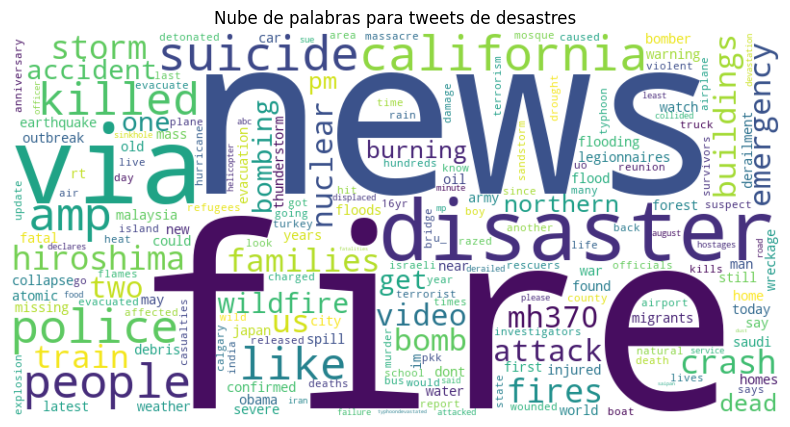

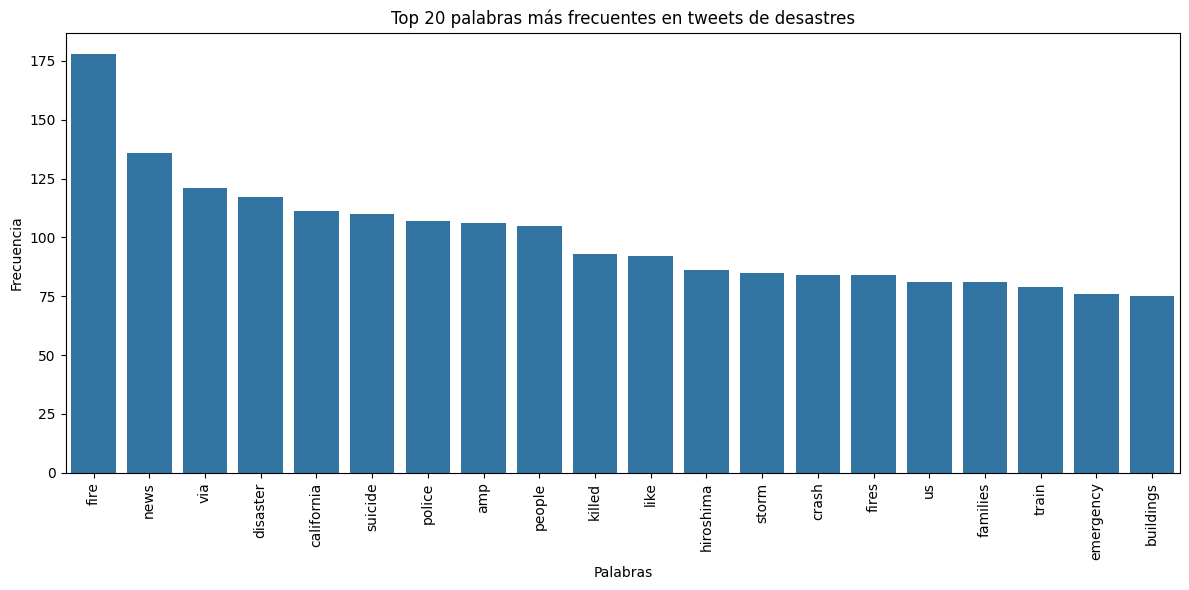

In [9]:
# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(disaster_word_freq)

# Plotear la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para tweets de desastres')
plt.show()

# Crear el histograma
top_words = dict(disaster_word_freq.most_common(20))
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()))
plt.xticks(rotation=90)
plt.title('Top 20 palabras más frecuentes en tweets de desastres')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Descarga los datos necesarios de nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rentt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
df = train.copy()
#df = df[['text']]

In [12]:
sid = SentimentIntensityAnalyzer()

# Función para obtener el sentimiento
def count_sentiment_words(text):
    # Tokenizar el texto

    # Calcular los puntajes de sentimiento de cada palabra
    positive_count = 0
    negative_count = 0
    neutral_count = 0
    words = text.split()

    for word in words:
        sentiment_score = sid.polarity_scores(word)
        if sentiment_score['compound'] >= 0.05:
            positive_count += 1
        elif sentiment_score['compound'] <= -0.05:
            negative_count += 1
        else:
            neutral_count += 1
            
    return positive_count, negative_count, neutral_count

# Aplicar la función a la columna 'text'
df[['positive_count', 'negative_count', 'neutral_count']] = df['text'].apply(lambda x: pd.Series(count_sentiment_words(x)))

def sentiment_intensity(row):
    # Si no hay palabras positivas ni negativas, el sentimiento es neutro
    if row['positive_count'] == 0 and row['negative_count'] == 0:
        return 0
    
    # Calcular un índice ponderado basado en la proporción de palabras positivas y negativas
    total_words = len(row['text'].split())
    
    # Índice de positividad y negatividad
    positive_ratio = row['positive_count'] / total_words
    negative_ratio = row['negative_count'] / total_words

    # Clasificación basada en el balance entre positivo y negativo
    if positive_ratio > negative_ratio:
        return positive_ratio 
    elif negative_ratio > positive_ratio:
        return - negative_ratio
    else:
        return 0

# Crear la columna 'sentiment_intensity'
df['sentiment_intensity'] = df.apply(sentiment_intensity, axis=1)

df.to_csv('sentiments.csv', index=False)

In [14]:
# top_10_negative = df.sort_values(by='negative_count', ascending=False).head(10)
# print(top_10_negative[['text', 'negative_count', 'sentiment']])


In [15]:
# top_10_positive = df.sort_values(by='positive_count', ascending=False).head(10)
# print(top_10_positive[['text', 'positive_count', 'sentiment']])


In [16]:
avg_negative_disaster = df[df['target'] == 1]['negative_count'].mean()
avg_negative_non_disaster = df[df['target'] == 0]['negative_count'].mean()

print(f"Promedio de negatividad - disaster: {avg_negative_disaster}")
print(f"Promedio de negatividad - non-disaster: {avg_negative_non_disaster}")


Promedio de negatividad - disaster: 1.074594925099358
Promedio de negatividad - non-disaster: 0.7648549055734685


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [46]:
training_data = df.copy()

training_data = training_data[['text', 'sentiment_intensity', 'target']]

# Separar features y target
X = training_data[['text', 'sentiment_intensity']]
y = training_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [49]:
# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=5000), 'text'),
        ('sentiment', StandardScaler(), ['sentiment_intensity'])
    ])

# Crear el pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Ajustar el modelo
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.68      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523

